In [1]:
import pathlib
import os
import sys

PROJECT_DIRECTORY = pathlib.PurePath(os.getcwd()).parent
CIFAR_PATH = PROJECT_DIRECTORY / "data" / "datasets" / "CIFAR10"
project_directory = str(PROJECT_DIRECTORY)
if project_directory not in sys.path:
    sys.path.insert(0, project_directory)


In [2]:
from torchvision import datasets, transforms
from torch.utils.data.dataloader import DataLoader

test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)
raw_testset = datasets.CIFAR10(
    str(CIFAR_PATH),
    train=False,
    transform=test_transform,
    download=True,
)
testloader = DataLoader(
    raw_testset,
    batch_size=8,
)

Files already downloaded and verified


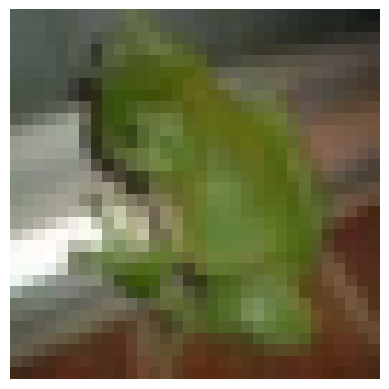

In [3]:
batch = next(iter(testloader))
x, labels = batch

import matplotlib.pyplot as plt

image = x[7].unsqueeze(0)
plt.axis("off")
plt.imshow(transforms.ToPILImage()(image.squeeze()))
plt.show()

True


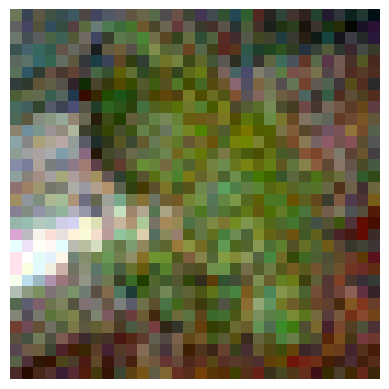

In [4]:
from src.fusion_detector.thirdparty.pytorch_cifar10 import module as M
from src.fusion_detector import perturbation

vgg = M.vgg19_bn(pretrained=True)
attack = perturbation.pgd(vgg, epsilon=0.1)
# attack = perturbation.fgsm(vgg, epsilon=0.05)

adversarial = attack(image)

print(adversarial.requires_grad)

plt.axis("off")
plt.imshow(transforms.ToPILImage()(adversarial.squeeze()))
# plt.imshow(transforms.ToPILImage()(adversarial.squeeze().clamp(0, 1)))
plt.show()

In [5]:
print(adversarial.squeeze())

tensor([[[0.4255, 0.2216, 0.3676,  ..., 0.0559, 0.1344, 0.0000],
         [0.3794, 0.2755, 0.3255,  ..., 0.0176, 0.0986, 0.1716],
         [0.4216, 0.2676, 0.3575,  ..., 0.2382, 0.1422, 0.1578],
         ...,
         [0.3422, 0.4382, 0.4225,  ..., 0.2608, 0.3255, 0.2755],
         [0.3412, 0.3059, 0.1863,  ..., 0.2873, 0.2598, 0.3363],
         [0.2931, 0.1471, 0.2745,  ..., 0.2520, 0.3980, 0.2324]],

        [[0.4686, 0.2686, 0.3482,  ..., 0.1333, 0.2137, 0.0655],
         [0.3765, 0.2725, 0.3225,  ..., 0.0255, 0.0716, 0.0716],
         [0.4686, 0.3108, 0.3635,  ..., 0.2304, 0.1631, 0.0922],
         ...,
         [0.2765, 0.3569, 0.3676,  ..., 0.1422, 0.1882, 0.1118],
         [0.3863, 0.1853, 0.0922,  ..., 0.1765, 0.1186, 0.1647],
         [0.1608, 0.0451, 0.1529,  ..., 0.1569, 0.1569, 0.1490]],

        [[0.3442, 0.3294, 0.2755,  ..., 0.1176, 0.1980, 0.0824],
         [0.3873, 0.3833, 0.2333,  ..., 0.0059, 0.1520, 0.2059],
         [0.4294, 0.3255, 0.3716,  ..., 0.2608, 0.1647, 0.